# Проект: Линейные модели в машинном обучении

## Описание проекта
Фермер хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».

Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!

Необходимо разработать модель машинного обучения, которая поможет фермеру управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. Нужно создать две прогнозные модели для отбора бурёнок в поголовье:
- Первая будет прогнозировать возможный удой коровы (целевой признак `Удой`);
- Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак `Вкус молока`).

С помощью модели нужно отобрать коров по двум критериям:
- средний удой за год — не менее 6000 килограммов;
- молоко должно быть вкусным.

## Описание данных

### Файл ferma_main.csv содержит данные о стаде фермера на текущий момент

- `id` — уникальный идентификатор коровы.
- `Удой, кг` — масса молока, которую корова даёт в год (в килограммах).
- `ЭКЕ (Энергетическая кормовая единица)` — показатель питательности корма коровы.
- `Сырой протеин, г` — содержание сырого протеина в корме (в граммах).
- `СПО (Сахаро-протеиновое соотношение)` — отношение сахара к протеину в корме коровы.
- `Порода` — порода коровы.
- `Тип пастбища` — ландшафт лугов, на которых паслась корова.
- `порода папы_быка` — порода папы коровы.
- `Жирность,%` — содержание жиров в молоке (в процентах).
- `Белок,%` — содержание белков в молоке (в процентах).
- `Вкус молока` — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
- `Возраст` — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

Признаки в датасете ferma_main.csv можно разделить на группы.
- Характеристики коровы: `id`, `Порода`, `порода папы_быка`, `Возраст`.
- Характеристики корма: `ЭКЕ (Энергетическая кормовая единица)`, `Сырой протеин, г`, `СПО (Сахаро-протеиновое соотношение)`.
- Характеристика пастбища: `Тип пастбища`.
- Характеристики молока: `Удой, кг`, `Жирность,%`, `Белок,%`, `Вкус молока`.

### Файл ferma_dad.csv хранит имя папы каждой коровы в стаде фермера
- `id` — уникальный идентификатор коровы.
- `Имя Папы` — имя папы коровы.

### Файл cow_buy.csv — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой
- `Порода` — порода коровы.
- `Тип пастбища` — ландшафт лугов, на которых паслась корова.
- `порода папы_быка` — порода папы коровы.
- `Имя_папы` — имя папы коровы.
- `Текущая_жирность,%` — содержание жиров в молоке (в процентах).
- `Текущий_уровень_белок,%` — содержание белков в молоке (в процентах).
- `Возраст` — возраст коровы, бинарный признак (менее 2 лет, более 2 лет).

Данные в файлах ferma_main.csv и cow_buy.csv похожи, но у датасета cow_buy.csv несколько особенностей.
- Содержание белков и жиров в молоке указано на момент продажи — когда «ЭкоФерма» давала коровам свой корм.
- Параметры корма `ЭКЕ (Энергетическая кормовая единица)`, `Сырой протеин, г` и `СПО (Сахаро-протеиновое соотношение)` отсутствуют. Технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%.
- Кроме того, отсутствуют признаки `Удой, кг` и `Вкус молока`. Это целевые признаки, именно их предстоит предсказать!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (r2_score, 
                             mean_absolute_error, 
                             mean_squared_error, 
                             confusion_matrix, 
                             accuracy_score,
                             recall_score,
                             precision_score
                            )
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

## Шаг 1. Загрузите и изучите данные

In [2]:
ferma_main = pd.read_csv('https://code.s3.yandex.net/datasets/ferma_main.csv', sep=';', decimal=",")
ferma_dad = pd.read_csv('https://code.s3.yandex.net/datasets/ferma_dad.csv', sep=';', decimal=",")
cow_buy = pd.read_csv('https://code.s3.yandex.net/datasets/cow_buy.csv', sep=';', decimal=",")

In [3]:
def primary_information(df):
    print(f"Размерность: {df.shape}")
    display(df.info())
    display(df.head())

#### Первичная информация по ferma_main

In [4]:
primary_information(ferma_main)

Размерность: (634, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null

None

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


#### Первичная информация по cow_buy

In [5]:
primary_information(ferma_dad)

Размерность: (629, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


None

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


#### Первичная информация по ferma_main

In [6]:
primary_information(cow_buy)

Размерность: (20, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


None

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


Приведем названия столбцов к единому стилю:

In [7]:
ferma_main = ferma_main.rename(columns={
    'Удой, кг' : 'milk_yield',
    'ЭКЕ (Энергетическая кормовая единица)' : 'energy_feed_unit',
    'Сырой протеин, г' : 'raw_protein',
    'СПО (Сахаро-протеиновое соотношение)': 'sugar_protein_ratio',
    'Порода': 'breed',
    'Тип пастбища': 'pasture_type',
    'порода папы_быка': 'dad_breed',
    'Жирность,%': 'fat_content',
    'Белок,%': 'protein',
    'Вкус молока': 'taste',
    'Возраст': 'age'
})

In [8]:
ferma_dad = ferma_dad.rename(columns={'Имя Папы' : 'dad_name'})

In [9]:
cow_buy = cow_buy.rename(columns={
    'Порода' : 'breed',
    'Тип пастбища' : 'pasture_type',
    'порода папы_быка' : 'dad_breed',
    'Имя_папы': 'dad_name',
    'Текущая_жирность,%': 'fat_content',
    'Текущий_уровень_белок,%': 'protein',
    'Возраст': 'age'
})

Объединим таблицы ```ferma_main``` и ```ferma_dad``` по ```id```

In [10]:
ferma_main = ferma_main.merge(ferma_dad, on='id')

## Промежуточный вывод

- Были загружены 3 датасета:
    - Данные по ферме
    - Данные по именам пап коров
    - Данные по коровам, рассматриваемых для покупки
- В результате первичного анализа было решено объединить данные по ферме и данные по именам пап коров в один датасет
- Были переименованы столбцы датасетов на английский язык и переведены в нижний регистр

## Шаг 2. Предобработка данных

### Проверим датасеты на наличие пропусков

In [11]:
ferma_main.isna().sum()

id                     0
milk_yield             0
energy_feed_unit       0
raw_protein            0
sugar_protein_ratio    0
breed                  0
pasture_type           0
dad_breed              0
fat_content            0
protein                0
taste                  0
age                    0
dad_name               0
dtype: int64

In [12]:
cow_buy.isna().sum()

breed           0
pasture_type    0
dad_breed       0
dad_name        0
fat_content     0
protein         0
age             0
dtype: int64

Пропуски отсутствуют

#### В поле ```Тип пастбища``` у таблиц ```ferma_main``` и ```cow_buy``` отличяается регистр. Приведем все к нижнему регистру

In [13]:
ferma_main.pasture_type = ferma_main.pasture_type.str.lower()

### Проверим наличие дубликатов и удалим их:

In [14]:
ferma_main[ferma_main.duplicated()]

,id,milk_yield,energy_feed_unit,raw_protein,sugar_protein_ratio,breed,pasture_type,dad_breed,fat_content,protein,taste,age,dad_name
627,627,5970,14.4,1837,0.88,РефлешнСоверинг,холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет,Барин
628,627,5970,14.4,1837,0.88,РефлешнСоверинг,холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет,Барин
629,627,5970,14.4,1837,0.88,РефлешнСоверинг,холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет,Барин
630,627,5970,14.4,1837,0.88,РефлешнСоверинг,холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет,Барин
631,627,5970,14.4,1837,0.88,РефлешнСоверинг,холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет,Барин


In [15]:
ferma_main.drop_duplicates(ignore_index=True, inplace=True)

Дубликаты в данных об именах пап каждой коровы в стаде фермера отсутствуют

In [16]:
cow_buy[cow_buy.duplicated()]

,breed,pasture_type,dad_breed,dad_name,fat_content,protein,age
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
14,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
19,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


Дубликаты в данных о коровах «ЭкоФермы» присутствуют, но здесь нет уверенности, что это одни и те же сущности, так как данных не так много. Вполне возможно, что это разные коровы.

Посмотрим, есть ли неявные дубликаты в категориальных признаках:

In [17]:
print("---------------ferma_main--------------")
print(f"Пастбище - {ferma_main['pasture_type'].unique()}")
print(f"Порода - {ferma_main['breed'].unique()}")
print(f"Порода папы - {ferma_main['dad_breed'].unique()}")
print(f"Вкус - {ferma_main['taste'].unique()}")
print(f"Возраст - {ferma_main['age'].unique()}")
print(f"Имя папы - {cow_buy['dad_name'].unique()}\r\n")
print("---------------cow_buy-----------------")
print(f"Пастбище - {cow_buy['pasture_type'].unique()}")
print(f"Порода - {cow_buy['breed'].unique()}")
print(f"Порода папы - {cow_buy['dad_breed'].unique()}")
print(f"Имя папы - {cow_buy['dad_name'].unique()}")
print(f"Возраст - {cow_buy['age'].unique()}")

---------------ferma_main--------------
Пастбище - ['равнинное' 'равнинные' 'холмистое']
Порода - ['Вис Бик Айдиал' 'РефлешнСоверинг']
Порода папы - ['Айдиал' 'Соверин' 'Айдиалл']
Вкус - ['вкусно' 'не вкусно']
Возраст - ['более_2_лет' 'менее_2_лет']
Имя папы - ['Геркулес' 'Буйный' 'Барин' 'Соловчик']

---------------cow_buy-----------------
Пастбище - ['холмистое' 'равнинное']
Порода - ['Вис Бик Айдиал' 'РефлешнСоверинг']
Порода папы - ['Айдиал' 'Соверин']
Имя папы - ['Геркулес' 'Буйный' 'Барин' 'Соловчик']
Возраст - ['более_2_лет' 'менее_2_лет']


Устраним неявные дубликаты в полях ```pasture_type``` и ```dad_breed```

In [18]:
ferma_main['pasture_type'] = ferma_main['pasture_type'].replace('равнинные', 'равнинное')
ferma_main['dad_breed'] = ferma_main['dad_breed'].replace('Айдиалл', 'Айдиал')

Проверим количественные признаки на аномальные выбросы. Построим ящики с усами:

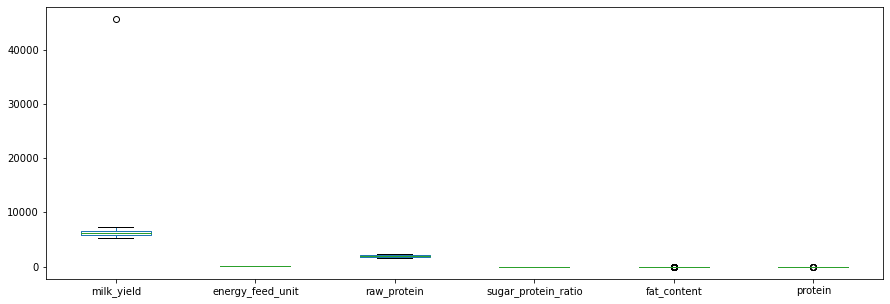

In [19]:
ferma_main[[
    'milk_yield',
    'energy_feed_unit', 
    'raw_protein', 
    'sugar_protein_ratio', 
    'fat_content', 
    'protein']].plot(kind='box', figsize=(15, 5));

Явно наблюдаем аномальный выброс в поле milk_yield. Лучше его удалить

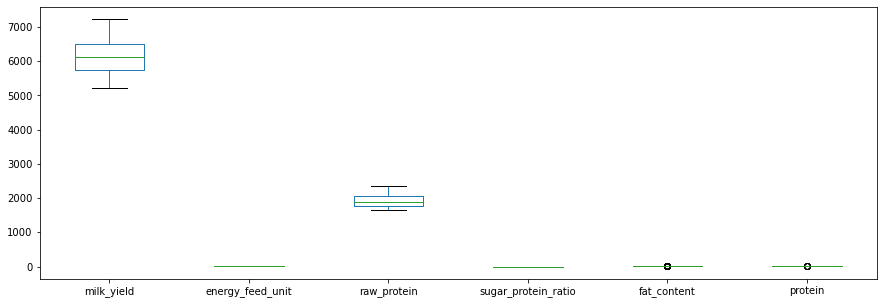

In [20]:
ferma_main.drop(ferma_main[ferma_main.milk_yield > 40000].index, inplace=True)
ferma_main[[
    'milk_yield',
    'energy_feed_unit', 
    'raw_protein', 
    'sugar_protein_ratio', 
    'fat_content', 
    'protein']].plot(kind='box', figsize=(15, 5));

```milk_yield``` и ```raw_protein``` не имеют аномальных выбросов, теперь построим ящики с усами в увеличенном масштабе для остальных признаков:

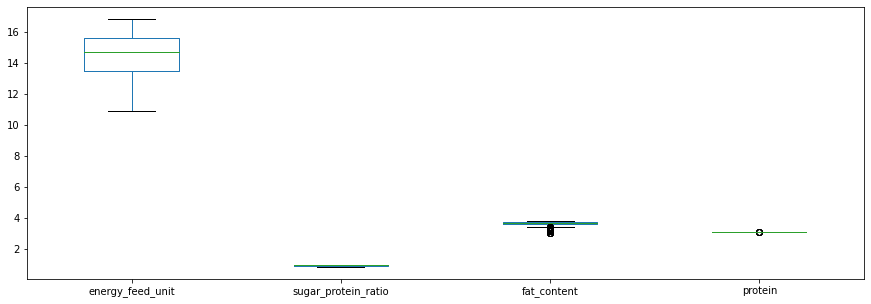

In [21]:
ferma_main[[
    'energy_feed_unit',
    'sugar_protein_ratio', 
    'fat_content', 
    'protein']].plot(kind='box', figsize=(15, 5));

Видно, что в полях ```fat_content``` и ```protein``` есть выбросы. Проанализируем эти признаки поподробнее:

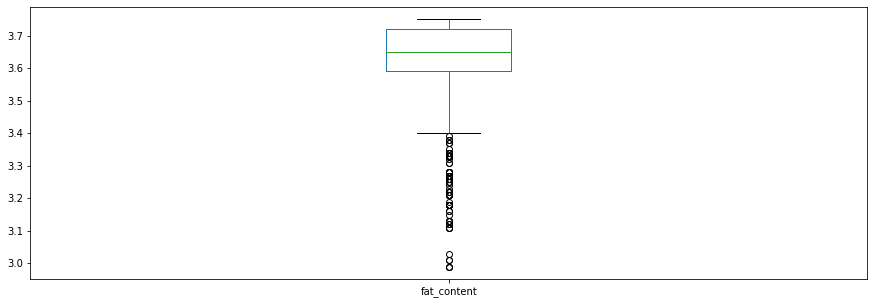

In [22]:
ferma_main[['fat_content']].plot(kind='box', figsize=(15, 5));

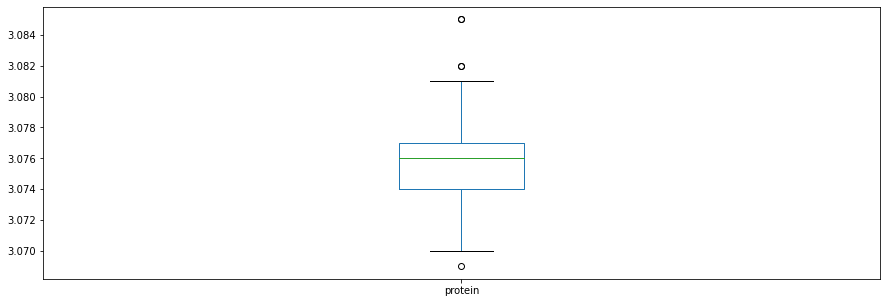

In [23]:
ferma_main[['protein']].plot(kind='box', figsize=(15, 5));

Выбросы есть, назвать их аномальными нельзя, поэтому лучше оставить их как есть. Посмотрим на ситуацию в таблице cow_buy

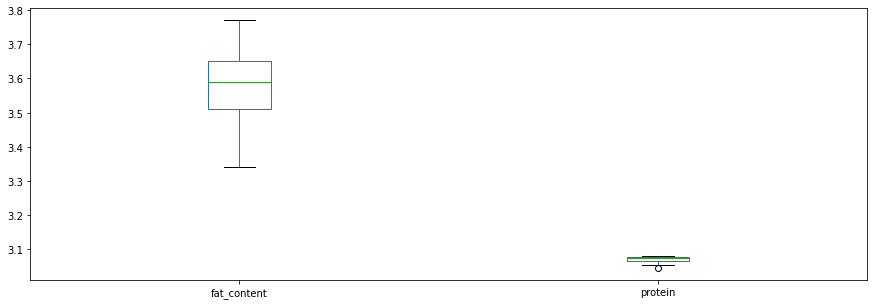

In [24]:
cow_buy[['fat_content', 'protein']].plot(kind='box', figsize=(15, 5));

### Шаг 3. Исследовательский анализ данных

Построим гистограммы количественных признаков:

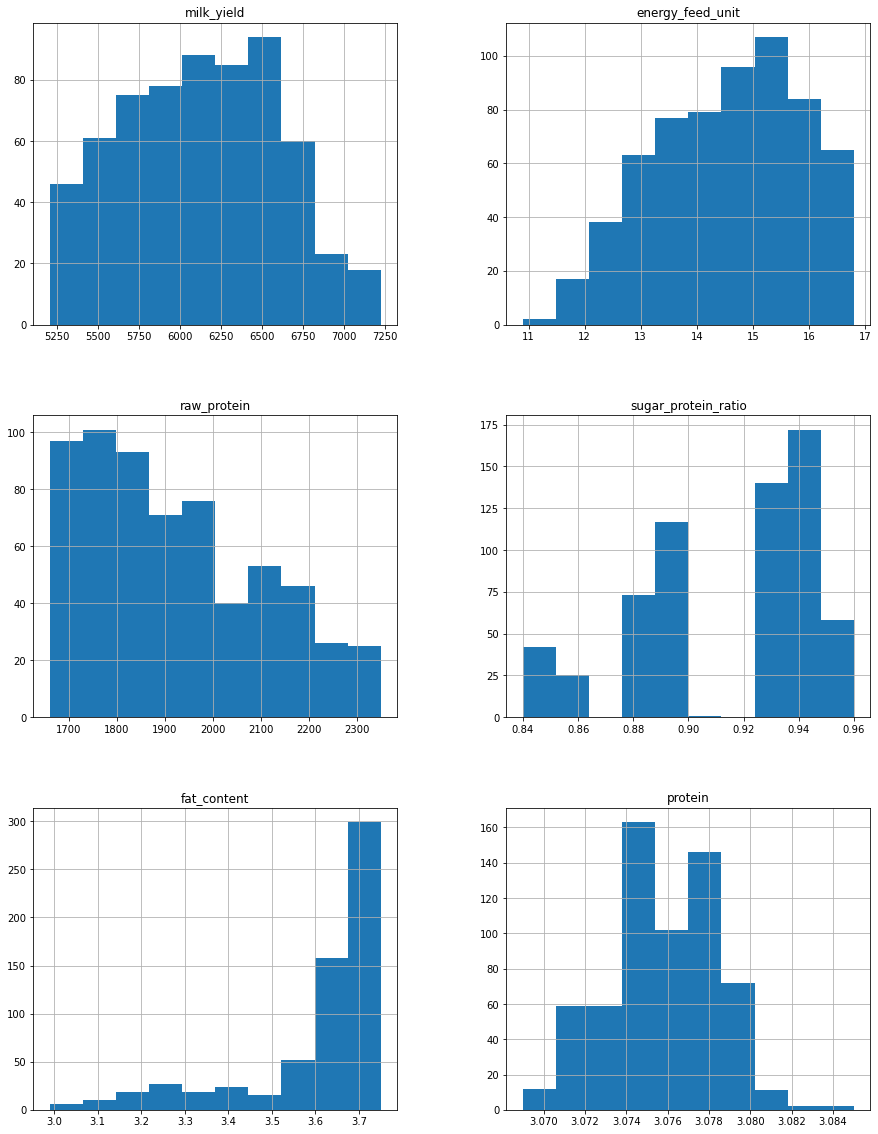

In [25]:
ferma_main[[
    'milk_yield',
    'energy_feed_unit', 
    'raw_protein', 
    'sugar_protein_ratio', 
    'fat_content', 
    'protein']].hist(figsize=(15, 20));

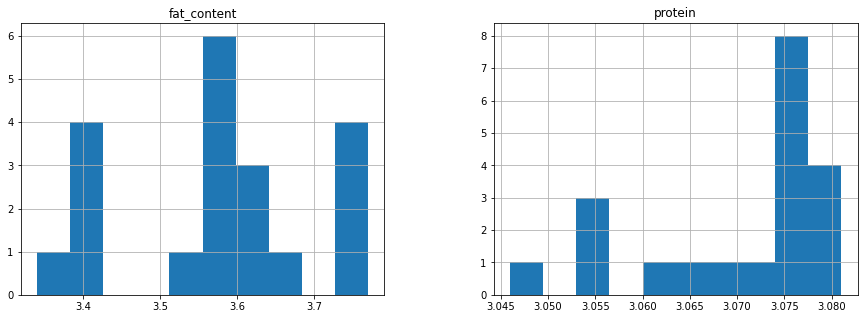

In [26]:
cow_buy[['fat_content', 'protein']].hist(figsize=(15, 5));

 Посмотрим на категориальные признаки:

In [27]:
def show_pie(df, columns, column_titles, main_title):
    fig, axes = plt.subplots(nrows=1, ncols=len(columns), sharey=True, figsize=(18, 6))
    if len(columns) == 1:
        (
            df[columns[0]].value_counts().plot.pie(autopct='%1.f%%', legend=False,
                wedgeprops = {"edgecolor" : "white", 
                              'linewidth': 2, 
                              'antialiased': True})
        )
        axes.title.set_text(column_titles[0])
    else:
        idx = 0
        for column in columns:    
            (
                df[column].value_counts().plot.pie(ax=axes[idx], autopct='%1.f%%', legend=False,
                    wedgeprops = {"edgecolor" : "white", 
                                  'linewidth': 2, 
                                  'antialiased': True})
            )
            axes[idx].title.set_text(column_titles[idx])
            idx+=1
    fig.suptitle(main_title, fontsize=30)

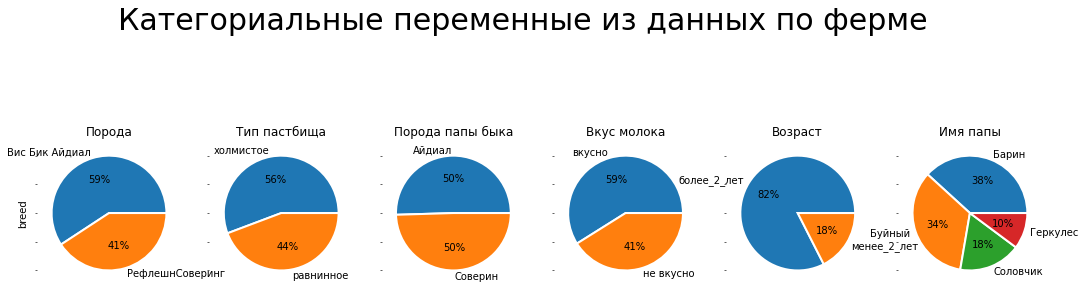

In [28]:
show_pie(
    ferma_main, 
    ['breed', 'pasture_type', 'dad_breed', 'taste', 'age', 'dad_name'], 
    ['Порода', 'Тип пастбища', 'Порода папы быка', 'Вкус молока', 'Возраст', 'Имя папы'],
    'Категориальные переменные из данных по ферме'
)

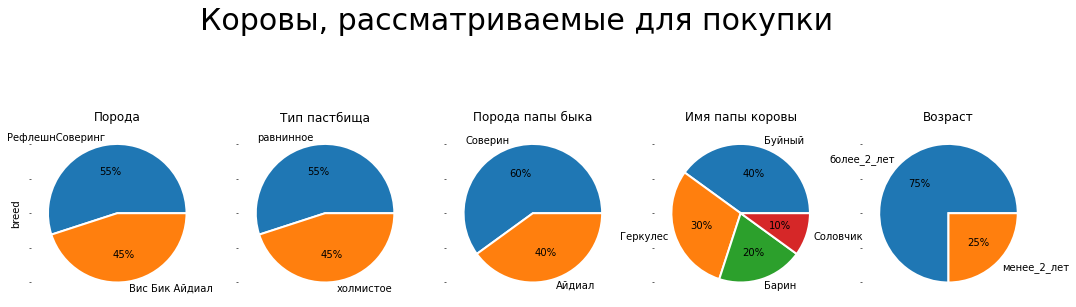

In [29]:
show_pie(
    cow_buy, 
    ['breed', 'pasture_type', 'dad_breed', 'dad_name', 'age'], 
    ['Порода', 'Тип пастбища', 'Порода папы быка', 'Имя папы коровы', 'Возраст'],
    'Коровы, рассматриваемые для покупки')

## Промежуточный вывод

Поля ```milk_yield```,
    ```energy_feed_unit```, 
    ```raw_protein```, 
   ```protein```
   имеют распределения близкие к нормальному. В поле ```sugar_protein_ratio``` можно заметить, что данные сгрупированны в три группы, около значений ```0.85```, ```0.90```, ```0.95```. Поле ```fat_content``` имеет в распределении два колокола.

### Шаг 4. Проведите корреляционный анализ признаков в датасете ferma_main.csv

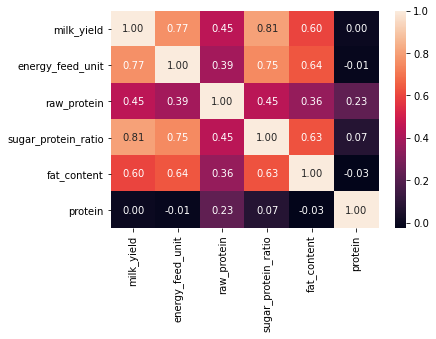

In [30]:
sns.heatmap(ferma_main.loc[:, ferma_main.columns!='id'].corr(), annot=True, fmt='.2f');

Видим, что целевой признак ```milk_yield``` имеет следующие связи:
- высокая теснота связи с признаками ```energy_feed_unit``` и ```sugar_protein_ratio```
- заметная теснота связи с признаками ```fat_content```
- умеренная теснота связи с признаками ```raw_protein```
- связь с признаком ```protein``` отсутствует



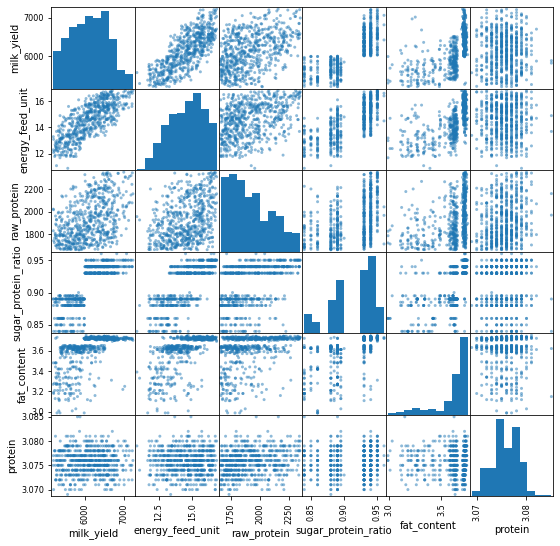

In [31]:
pd.plotting.scatter_matrix(ferma_main.loc[:, ferma_main.columns!='id'], figsize=(9, 9));

In [32]:
def show_scatterplot_with_milk_yield(df, y, columns, cols, main_title):
    rows = ((len(columns) + cols - 1) // cols)
    fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(18, 4 * rows))
    for i in range(len(columns)):
        sns.scatterplot(data=df, x='milk_yield', y=y, hue=columns[i], ax=axs[i // cols][i % cols])
    fig.suptitle(f"Диаграммы рассеяния для Удой и {main_title}", fontsize=30)

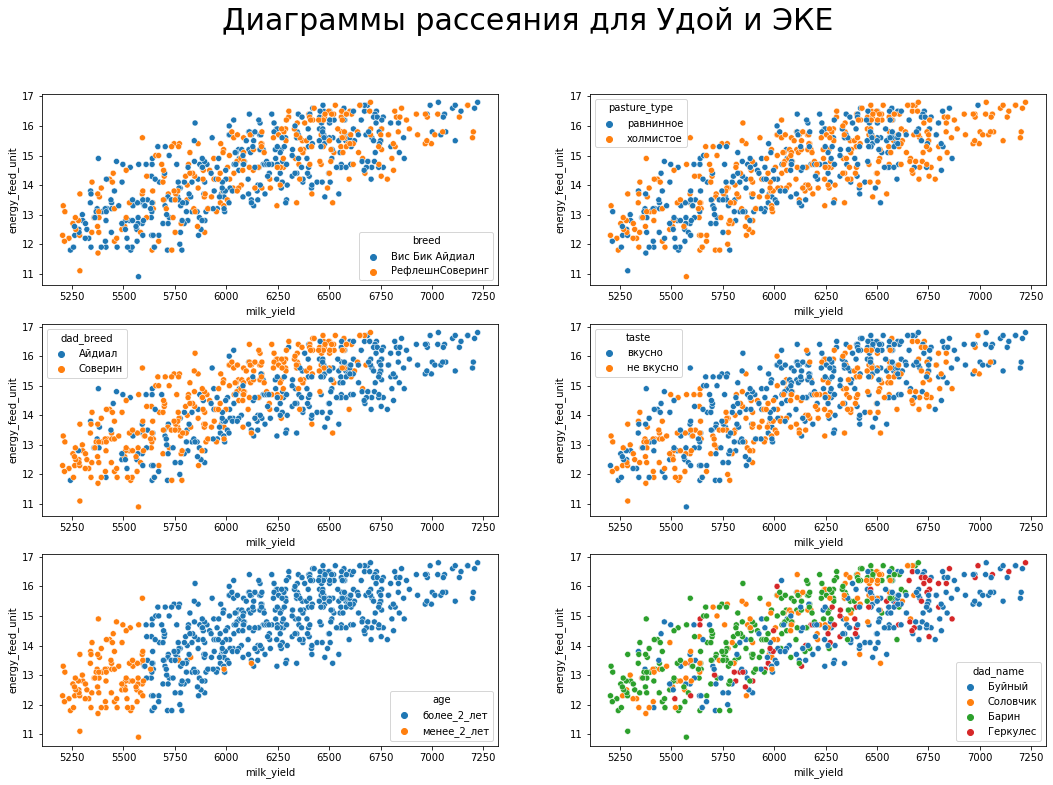

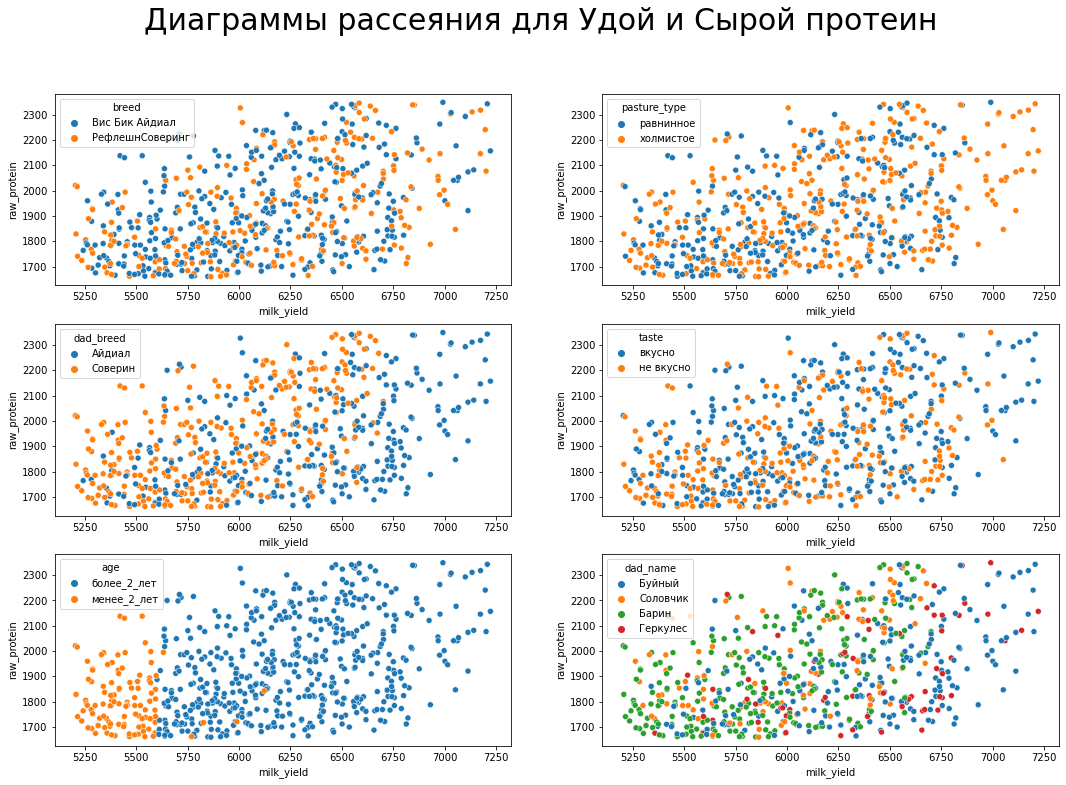

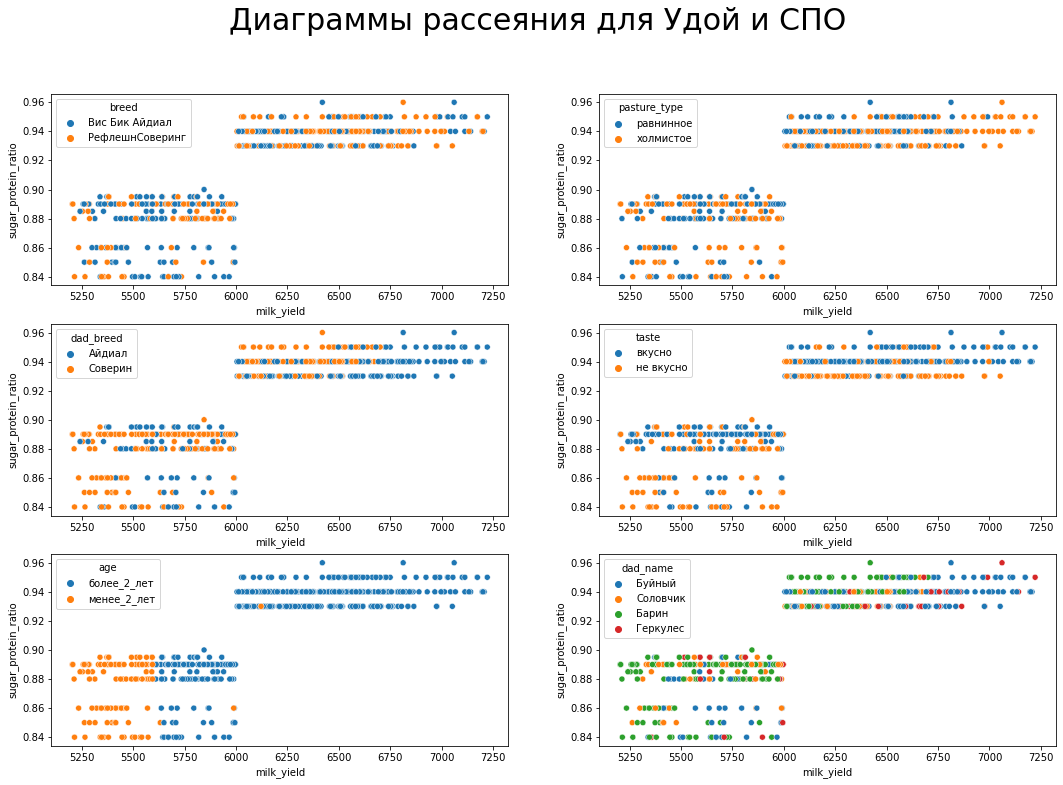

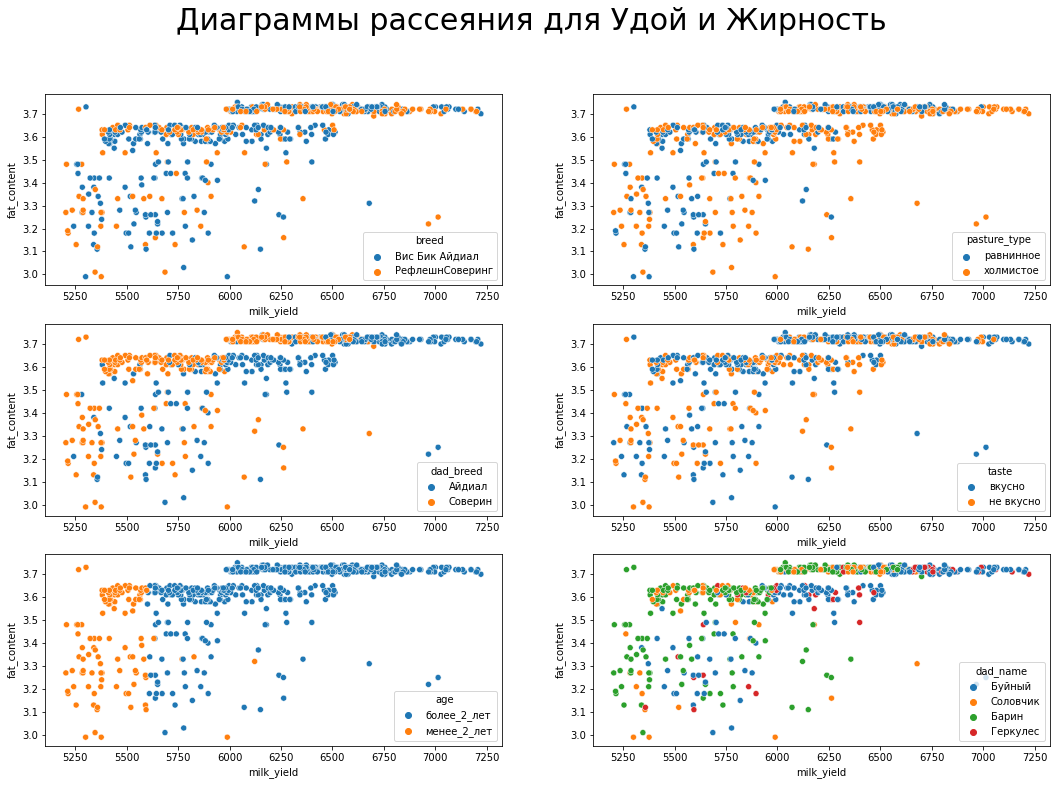

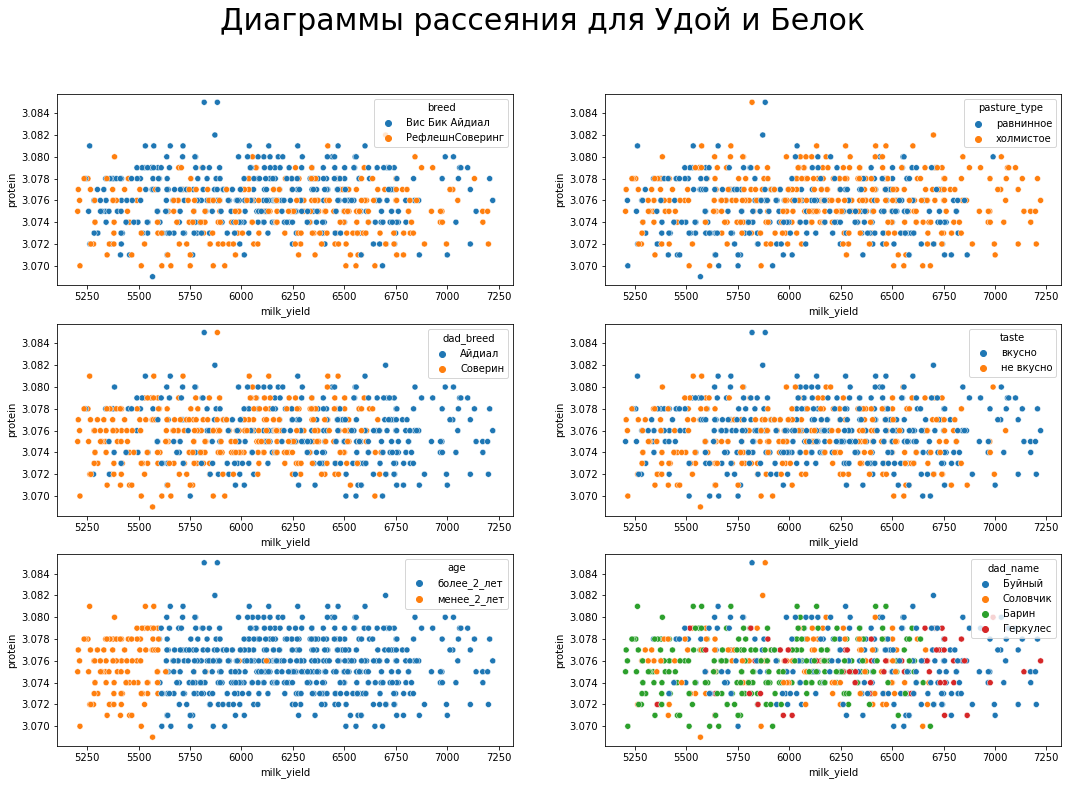

In [33]:
quantitative_vars = {
    'ЭКЕ' : 'energy_feed_unit',
    'Сырой протеин' : 'raw_protein',
    'СПО': 'sugar_protein_ratio',
    'Жирность': 'fat_content',
    'Белок': 'protein'
}
categorical_vars = ['breed','pasture_type','dad_breed','taste','age','dad_name']

for item in quantitative_vars:
    show_scatterplot_with_milk_yield(ferma_main, quantitative_vars[item], categorical_vars, 2, item)

In [34]:
def show_hist_for_column(df, column, columns, cols, main_title):
    rows = ((len(columns) + cols - 1) // cols)
    fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(18, 4 * rows))
    for i in range(len(columns)):
        sns.histplot(x = column, hue = columns[i], data = df, multiple = "dodge", ax=axs[i // cols][i % cols])
    fig.suptitle(main_title, fontsize=30)

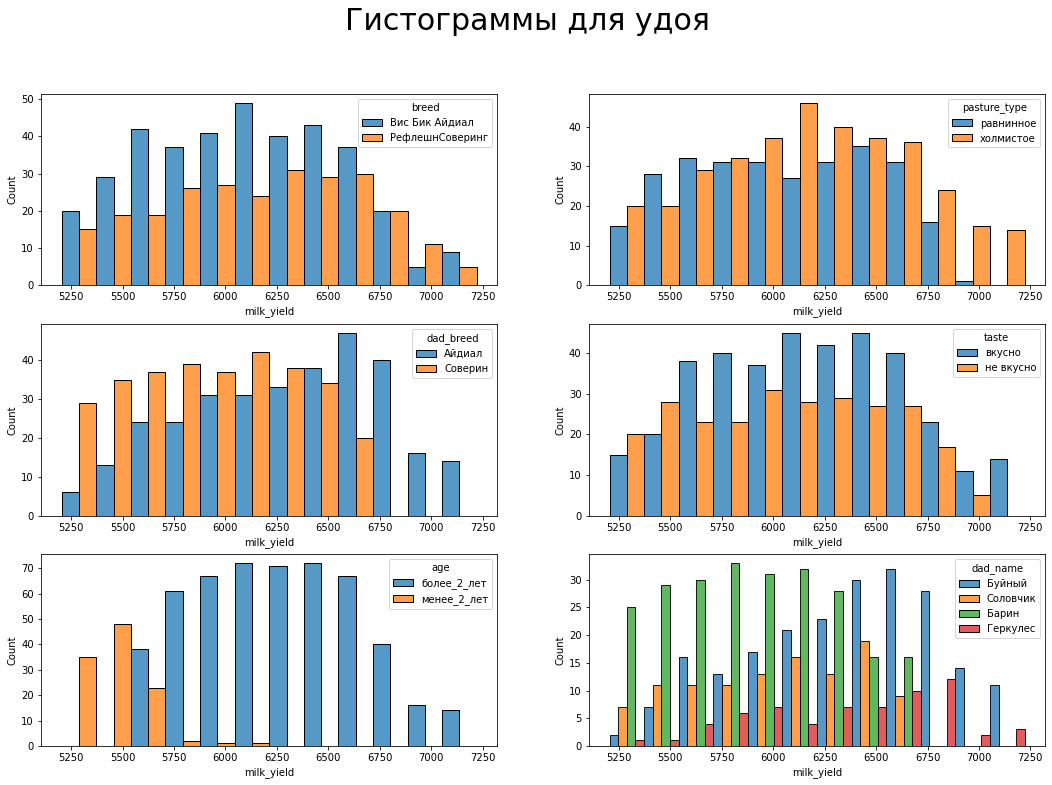

In [35]:
show_hist_for_column(ferma_main, "milk_yield", categorical_vars, 2, "Гистограммы для удоя")

In [36]:
def show_hist_for_teste_group(df, column, columns, cols, main_title):
    rows = ((len(columns) + cols - 1) // cols)
    fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(18, 4 * rows))
    for i in range(len(columns)):
        sns.histplot(x = columns[i], hue = column, data = df, multiple = "dodge", ax=axs[i // cols][i % cols])
    fig.suptitle(main_title, fontsize=30)

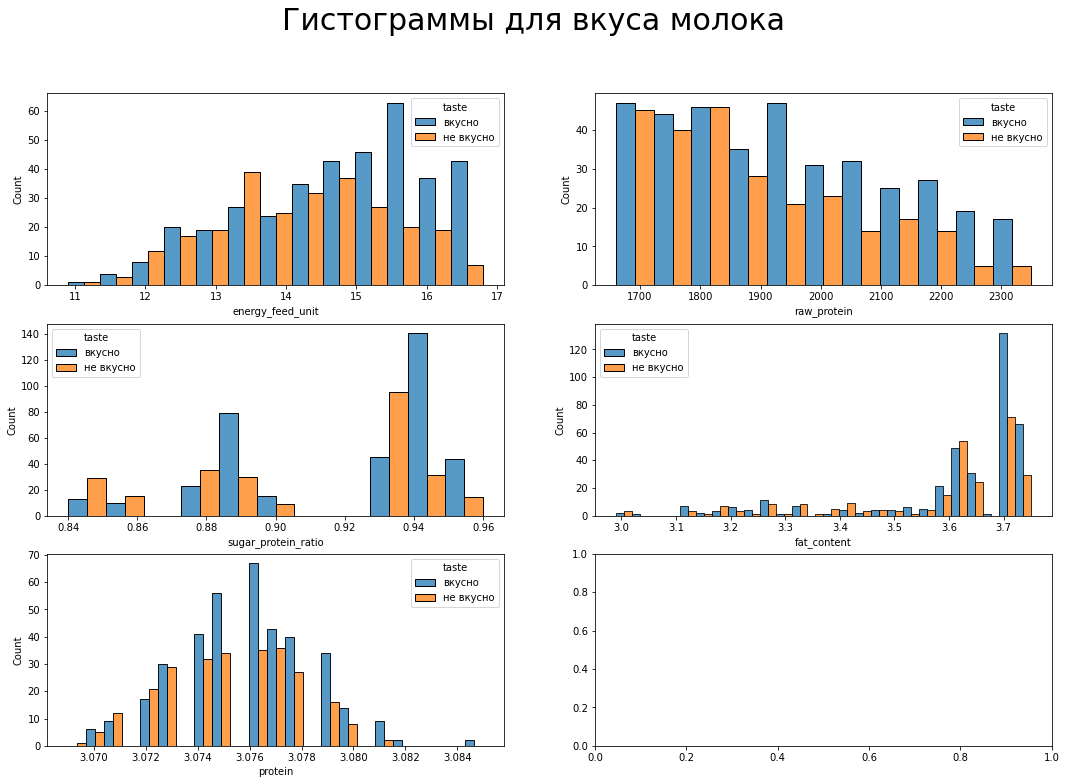

In [37]:
show_hist_for_teste_group(ferma_main, "taste", list(quantitative_vars.values()), 2, "Гистограммы для вкуса молока")

## Промежуточный вывод
- Согласно таблице корреляции можно сделать вывод, что удой обладает высокой теснотой связи с ```ЭКЕ```, ```СПО``` и заметной теснотой связи с признаком ```Жирность```
- Связь удоя с ```СПО``` и ```Жирность``` нельзя назвать линейной
- По диаграмме рассеяния видно, что теснота связи удоя с ```ЭКЕ``` различна у коров с различной породой папы быка
- ```ЭКЕ``` и ```СПО```обладают высокой теснотой связи, есть склонность к коллинеарности 
- Согласно гистограммам удоя можно сказать, что на целевой признак оказывают существенное влияние ```Порода папы быка```, ```Возраст``` и ```Тип пастбища```

### Шаг 5.1. Задача регрессии

In [38]:
RANDOM_STATE = 42

В качестве целевого признака выберем ```Удой, кг```, а в качестве входных:
- ```ЭКЕ```
- ```СПО```
- ```Тип пастбища```
- ```Порода папы быка```
- ```Возраст```

In [39]:
def prepare_data(X, num_col_names, cat_col_names):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X[num_col_names])
    X_scaled = pd.DataFrame(X_scaled, columns=num_col_names)
    
    encoder = OneHotEncoder(sparse=False, drop='first')
    X_ohe = encoder.fit_transform(X[cat_col_names])

    encoder_col_names = encoder.get_feature_names() 

    X_ohe = pd.DataFrame(X_ohe, columns=encoder_col_names)
    
    return pd.concat([X_ohe, X_scaled], axis=1)

In [40]:
cat_col_names = ['pasture_type', 'dad_breed', 'age']
num_col_names = ['energy_feed_unit', 'sugar_protein_ratio', 'raw_protein']

In [41]:
X = ferma_main[cat_col_names + num_col_names]
y = ferma_main['milk_yield']
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)
X_train = prepare_data(X_train, num_col_names, cat_col_names)
X_test = prepare_data(X_test, num_col_names, cat_col_names)

In [42]:
model_lr_1  = LinearRegression()
model_lr_1.fit(X_train, y_train)

predictions_1 = model_lr_1.predict(X_test)

r2_1 = r2_score(predictions_1, y_test)
print(f'R2 = {r2_1:.2f}')

R2 = 0.73


In [43]:
def show_residuals(y_test, predictions):
    residuals = y_test - predictions

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    axes[0].hist(residuals)
    axes[0].set_title('Гистограмма распределения остатков')
    axes[0].set_xlabel('Остатки')

    axes[1].scatter(x=predictions, y=residuals)
    axes[1].set_xlabel('Предсказания модели')
    axes[1].set_ylabel('Остатки')
    axes[1].set_title('Анализ дисперсии')
    plt.show()

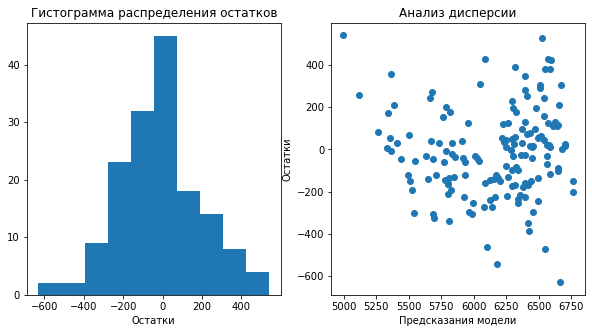

In [44]:
show_residuals(y_test, predictions_1)

## Промежуточный вывод
- В качестве целевого признака был ```Удой, кг```, а в качестве входных ```ЭКЕ```, ```СПО```, ```Тип пастбища```, ```Порода папы быка```, ```Возраст```
- Данные были разбиты на тренировочную и тестовую выборки.
- Категориальные признаки были закодированы с помощью OneHotEncoder.
- Количественные признаки были отмасштабированы с помощью StandardScaler.
- В результате, после обучения модели, были получены результаты с R2 = 0.73. Это значит что наша модель правильно предсказывает ```Удой, кг``` в 73% случаев
- Гистограмма остатков обладает нормальным распределением с небольшим смещением влево. Дисперсия имеет форму близкую к дуге
- Для улучшения предсказания, можно преобразовать входные признаки для исключения нелинейности

### Шаг 5.2. Задача регрессии

При анализе данных было видно, что ЭКЕ имеет нелинейный характер, а ```СПО``` сгруппированы в две группы, а ```Жирность``` в три. Поэтому преобразуем входные признаки для устранения этих моментов:
- Преобразуем СПО в категориальный бинарный признак, использовав границу ```0.91``` и ```0.87```
- Преобразуем жирность в категориальный признак, использовав границы ```3.65``` и ```3.55```
- Введем новый признак ЭКЕ в квадрате

In [45]:
def spr_cat(x):
    if x > 0.91:
        return '2'
    if x > 0.87:
        return '1'
    return '0'
ferma_main['spr_cat'] = ferma_main['sugar_protein_ratio'].apply(spr_cat)

In [46]:
def fat_cat(x):
    if x > 3.65:
        return '2'
    if x > 3.55:
        return '1'
    return '0'
ferma_main['fat_cat'] = ferma_main['fat_content'].apply(fat_cat)

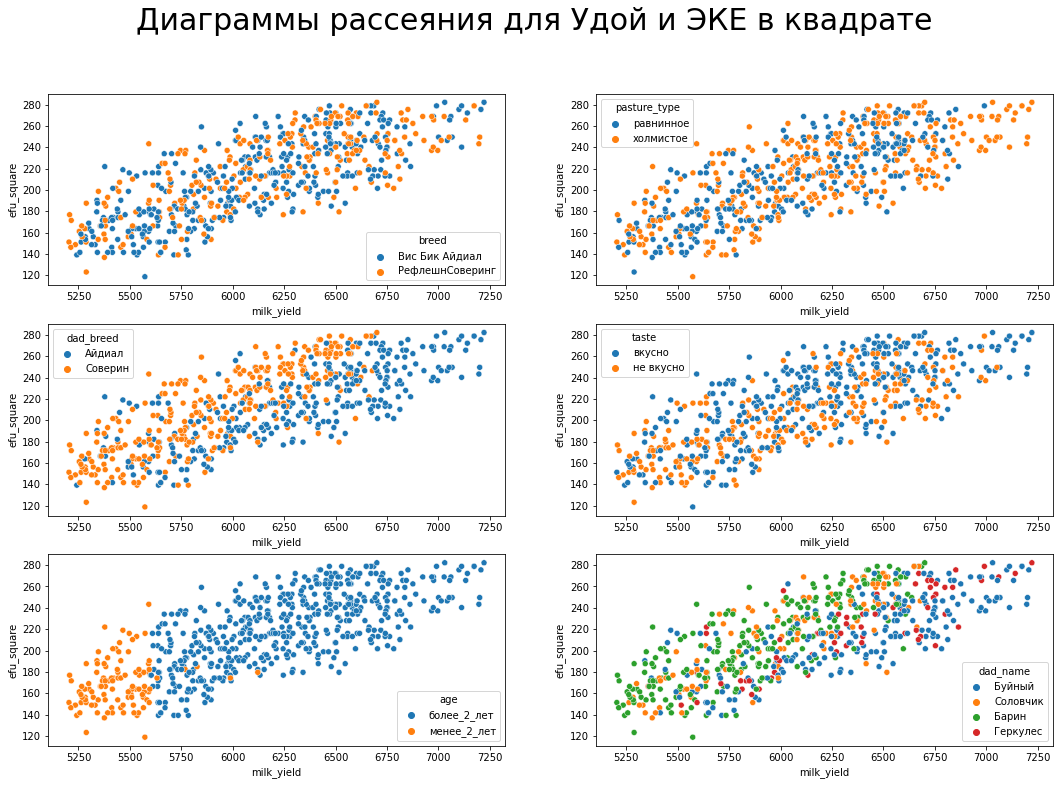

In [47]:
ferma_main['efu_square'] = ferma_main['energy_feed_unit']**2
show_scatterplot_with_milk_yield(ferma_main, 'efu_square', categorical_vars, 2, 'ЭКЕ в квадрате')

In [48]:
cat_col_names = ['pasture_type', 'dad_breed', 'age', 'spr_cat', 'fat_cat']
num_col_names = ['efu_square', 'raw_protein']

In [49]:
X = ferma_main[cat_col_names + num_col_names]
y = ferma_main['milk_yield']
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)
X_train = prepare_data(X_train, num_col_names, cat_col_names)
X_test = prepare_data(X_test, num_col_names, cat_col_names)

In [50]:
model_lr_2  = LinearRegression()
model_lr_2.fit(X_train, y_train)

predictions_2 = model_lr_2.predict(X_test)

r2_2 = r2_score(predictions_2, y_test)
print(f'R2 = {r2_2:.2f}')

R2 = 0.77


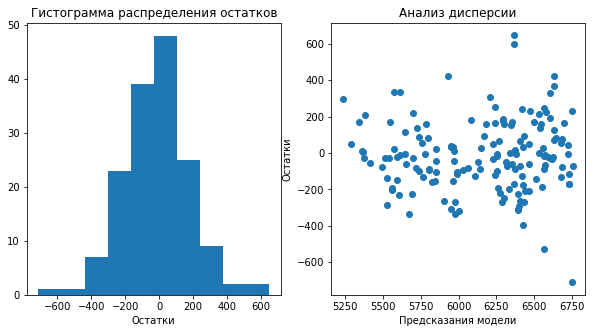

In [51]:
show_residuals(y_test, predictions_2)

## Промежуточный вывод
- В качестве целевого признака был ```Удой, кг```, а в качестве входных ```ЭКЕ в квадрате```, ```СПО бинарный```, ```Тип пастбища```, ```Порода папы быка```, ```Возраст```
- В результате, после обучения откорректированной модели, были получены результаты с R2 = 0.77. Это значит что наша модель научилась лучше предсказывать ```Удой, кг``` на 4% процента лучше
- Гистограмма остатков все также обладает нормальным распределением, но уже c меньшим смещением. Форма дуги в дисперсии уже прослеживается меньше

### Шаг 5.3. Задача регрессии

Добавим признак ```Имя папы коровы```

In [52]:
cat_col_names = ['pasture_type', 'dad_breed', 'age', 'spr_cat', 'fat_cat', 'dad_name']
num_col_names = ['efu_square', 'raw_protein']

In [53]:
X = ferma_main[cat_col_names + num_col_names]
y = ferma_main['milk_yield']
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)
X_train = prepare_data(X_train, num_col_names, cat_col_names)
X_test = prepare_data(X_test, num_col_names, cat_col_names)

In [54]:
model_lr_3  = LinearRegression()
model_lr_3.fit(X_train, y_train)

predictions_3 = model_lr_3.predict(X_test)

r2_3 = r2_score(predictions_3, y_test)
print(f'R2 = {r2_3:.2f}')

R2 = 0.79


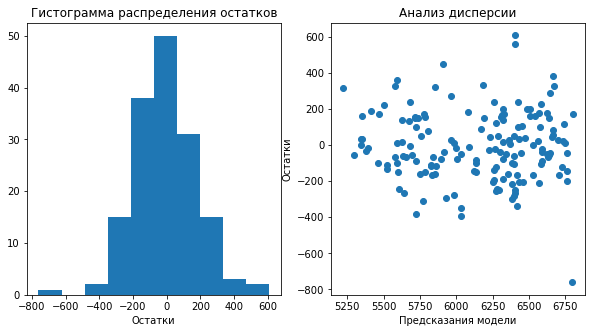

In [55]:
show_residuals(y_test, predictions_3)

## Промежуточный вывод
- В качестве целевого признака был ```Удой, кг```, а в качестве входных ```ЭКЕ в квадрате```, ```СПО бинарный```, ```Тип пастбища```, ```Порода папы быка```, ```Возраст``` и ```Имя папы коровы```
- В результате, после обучения откорректированной модели, были получены результаты с R2 = 0.79. Это значит что наша модель научилась лучше предсказывать ```Удой, кг``` еще на 2% процента лучше
- Гистограмма остатков все также обладает нормальным распределением, но уже без смещения. Форма дисперсии уже стала похожа на случайную

### Шаг 5.4. Задача регрессии

Оценим качество каждой модели по трём метрикам: MSE, MAE, RMSE.

In [56]:
def print_metrics(predictions, y_test):
    mse = mean_squared_error(predictions, y_test)
    mae = mean_absolute_error(predictions, y_test)
    rmse = mean_squared_error(predictions, y_test, squared=False)
    r2 = r2_score(predictions, y_test)
    print(f"MSE = {mse:.0f}, MAE = {mae:.0f}, RMSE={rmse:.0f}, R2 = {r2:.2f}")

In [57]:
print_metrics(predictions_1, y_test)

MSE = 43202, MAE = 162, RMSE=208, R2 = 0.73


In [58]:
print_metrics(predictions_2, y_test)

MSE = 38166, MAE = 148, RMSE=195, R2 = 0.77


In [59]:
print_metrics(predictions_3, y_test)

MSE = 37041, MAE = 150, RMSE=192, R2 = 0.79


Изучив метрики трех моделей, можно сделать вывод, что третья модель получилась самая точная, верно предсказывает целевой признак в 79% случаев и ошибается в среднем на 150 единиц

С помощью лучшей модели спрогнозируем удой коров, которых фермер хочет купить. Данные о них находятся в датасете ```cow_buy.csv```

Добавим недостающие признаки ```ЭКЕ (Энергетическая кормовая единица)```, ```Сырой протеин, г``` и ```СПО (Сахаро-протеиновое соотношение)```: возьмем из датасета ferma_main.csv средние значения каждого из признаков и увелим их на 5%.

In [60]:
cow_buy['sugar_protein_ratio'] = ferma_main['sugar_protein_ratio'].mean()*1.05
cow_buy['energy_feed_unit'] = ferma_main['energy_feed_unit'].mean()*1.05
cow_buy['raw_protein'] = ferma_main['raw_protein'].mean()*1.05
cow_buy['spr_cat'] = cow_buy['fat_content'].apply(spr_cat)
cow_buy['efu_square'] = cow_buy['energy_feed_unit']**2
cow_buy['fat_cat'] = cow_buy['fat_content'].apply(fat_cat)

In [61]:
X_valid = prepare_data(cow_buy, num_col_names, cat_col_names)

In [62]:
X_valid.columns

Index(['x0_холмистое', 'x1_Соверин', 'x2_менее_2_лет', 'x4_1', 'x4_2',
       'x5_Буйный', 'x5_Геркулес', 'x5_Соловчик', 'efu_square', 'raw_protein'],
      dtype='object')

In [63]:
X_test.columns

Index(['x0_холмистое', 'x1_Соверин', 'x2_менее_2_лет', 'x3_1', 'x3_2', 'x4_1',
       'x4_2', 'x5_Буйный', 'x5_Геркулес', 'x5_Соловчик', 'efu_square',
       'raw_protein'],
      dtype='object')

Так как мы СПО добавили как константу, то бинарный признак ```spr_cat``` принял у всех строк значение 1, и из-за оптимизации лишние столбцы были удалены, вернем их обратно, чтобы модель могла корректно работать

In [64]:
X_valid['x3_1'] = cow_buy['spr_cat'][0]
X_valid['x3_2'] = cow_buy['spr_cat'][0]

In [65]:
predictions_milk_yield = model_lr_3.predict(X_valid)

In [66]:
cow_buy['predictions_milk_yield'] = predictions_milk_yield
cow_buy

,breed,pasture_type,dad_breed,dad_name,fat_content,protein,age,sugar_protein_ratio,energy_feed_unit,raw_protein,spr_cat,efu_square,fat_cat,predictions_milk_yield
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,0.958744,15.276162,2019.947532,2,233.361138,1,6064.566896
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,0.958744,15.276162,2019.947532,2,233.361138,0,5560.851253
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,0.958744,15.276162,2019.947532,2,233.361138,1,5740.511356
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,0.958744,15.276162,2019.947532,2,233.361138,0,5803.575421
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,0.958744,15.276162,2019.947532,2,233.361138,1,5741.133218
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,0.958744,15.276162,2019.947532,2,233.361138,1,5821.842728
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,0.958744,15.276162,2019.947532,2,233.361138,1,6064.566896
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,0.958744,15.276162,2019.947532,2,233.361138,1,5771.221286
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,0.958744,15.276162,2019.947532,2,233.361138,1,5740.511356
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,0.958744,15.276162,2019.947532,2,233.361138,0,5606.028807


### Шаг 6. Задача классификации

В качестве целевого признака используем ```Вкус молока```. В качестве входных:
- ```Тип пастбища```
- ```Имя папы быка```
- ```Порода папы быка```
- ```Возраст```
- ```Булево значение СПО```
- ```Квадрат ЭКЕ```
- ```Жирность```
- ```Белок```

In [67]:
cat_col_names = ['pasture_type', 'dad_breed', 'age', 'spr_cat', 'dad_name', 'fat_cat']
num_col_names = ['efu_square', 'protein']

In [68]:
def taste_cat(x):
    if x == 'вкусно':
        return 1
    return 0

In [69]:
ferma_main['taste_cat'] = ferma_main['taste'].apply(taste_cat)

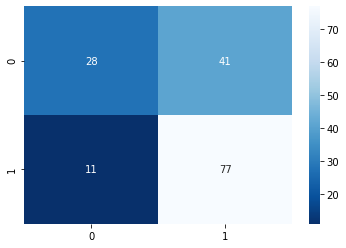

In [70]:
X = ferma_main[cat_col_names + num_col_names]
y = ferma_main['taste_cat']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    random_state=RANDOM_STATE
)

X_train = prepare_data(X_train, num_col_names, cat_col_names)
X_test = prepare_data(X_test, num_col_names, cat_col_names)

clf = LogisticRegression()

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r');

In [71]:
acc = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print(f"Accuracy = {acc:.2f}, recall = {recall:.2f}, precision = {precision:.2f}")

Accuracy = 0.67, recall = 0.88, precision = 0.65


Для фермера важен вкус молока, поэтому для нас критично если купят невкусное молоко. Следовательно, необходимо минимизировать ошибки первого рода, то есть максимизировать precision

In [72]:
values = []
thresholds = [round(i,2) for i in np.linspace(0.1,1,num = 100,endpoint=False)]
y_proba = clf.predict_proba(X_test)[:,1]
data = pd.DataFrame(zip(y_test, y_proba), columns = ['y_valid', 'y_proba'])
for i in thresholds:
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda y_proba: 1 if y_proba >= i else 0)
    tp = (data['y_pred_'+str(i)] & y_test).sum()
    fp = (data['y_pred_'+str(i)] & ~y_test).sum()
    if (tp + fp) > 0:
        values.append(('y_pred_'+str(i), (tp / (tp + fp))))
display(values[-12:])

[('y_pred_0.74', 0.7142857142857143),
 ('y_pred_0.75', 0.8333333333333334),
 ('y_pred_0.76', 0.8333333333333334),
 ('y_pred_0.77', 0.8333333333333334),
 ('y_pred_0.78', 0.8333333333333334),
 ('y_pred_0.78', 0.8333333333333334),
 ('y_pred_0.79', 1.0),
 ('y_pred_0.8', 1.0),
 ('y_pred_0.81', 1.0),
 ('y_pred_0.82', 1.0),
 ('y_pred_0.83', 1.0),
 ('y_pred_0.84', 1.0)]

При пороге равном 0.79 получаем количество ошибок первого рода равное нулю

In [73]:
milk_taste_threashold = 0.79

In [74]:
X_valid = prepare_data(cow_buy, num_col_names, cat_col_names)
X_valid['x3_1'] = cow_buy['spr_cat'][0]
X_valid['x3_2'] = cow_buy['spr_cat'][0]

In [75]:
X_valid.shape

(20, 12)

In [76]:
X_valid.columns

Index(['x0_холмистое', 'x1_Соверин', 'x2_менее_2_лет', 'x4_Буйный',
       'x4_Геркулес', 'x4_Соловчик', 'x5_1', 'x5_2', 'efu_square', 'protein',
       'x3_1', 'x3_2'],
      dtype='object')

In [77]:
X_train.columns

Index(['x0_холмистое', 'x1_Соверин', 'x2_менее_2_лет', 'x3_1', 'x3_2',
       'x4_Буйный', 'x4_Геркулес', 'x4_Соловчик', 'x5_1', 'x5_2', 'efu_square',
       'protein'],
      dtype='object')

In [78]:
y_pred = clf.predict(X_valid)
y_proba = clf.predict_proba(X_valid)[:,1]

In [79]:
predictions_milk_taste = y_proba >= milk_taste_threashold

In [80]:
cow_buy['predictions_milk_taste'] = predictions_milk_taste

In [81]:
cow_buy.query("predictions_milk_taste == True and predictions_milk_yield > 6000")

,breed,pasture_type,dad_breed,dad_name,fat_content,protein,age,sugar_protein_ratio,energy_feed_unit,raw_protein,spr_cat,efu_square,fat_cat,predictions_milk_yield,predictions_milk_taste
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,0.958744,15.276162,2019.947532,2,233.361138,1,6064.566896,True
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,0.958744,15.276162,2019.947532,2,233.361138,1,6064.566896,True
10,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,0.958744,15.276162,2019.947532,2,233.361138,2,6339.324326,True
11,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,0.958744,15.276162,2019.947532,2,233.361138,2,6220.729695,True
16,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.079,более_2_лет,0.958744,15.276162,2019.947532,2,233.361138,2,6339.324326,True


## Итоговые выводы

- Были загружены 3 датасета:
    - Данные по ферме
    - Данные по именам пап коров
    - Данные по коровам, рассматриваемых для покупки
- В результате первичного анализа было решено объединить данные по ферме и данные по именам пап коров в один датасет
- Были переименованы столбцы датасетов на английский язык и переведены в нижний регистр
- В поле ```Тип пастбища``` у таблиц ```ferma_main``` и ```cow_buy``` оличался регистр. Было решено первести все к нижнему регистру
- В датасете ```ferma_main``` были обнаружены и удалены дубликаты
- В датасете ```cow_buy``` были обнаружены дубликаты, но было принято решение их не удалять, потому что нет уверенности в том, что это не ра зные сущности
- В полях ```pasture_type``` и ```dad_breed``` были устранены неявные дубликаты 
- В поле milk_yield был обнаружен и удален аномальный выброс
- В ходе исследовательского анализа данных были сделаны следующие заключения:
    - поля ```milk_yield```,
    ```energy_feed_unit```, 
    ```raw_protein```, 
   ```protein```
   имеют распределения близкие к нормальному. 
   - Поле ```sugar_protein_ratio``` можно заметить, что данные сгрупированны в три группы, около значений ```0.85```, ```0.90```, ```0.95```
   - Поле ```fat_content``` имеет в распределении два колокола.
- В ходе корреляционного анализа признаков в датасете ferma_main были отмечены следующие наблюдения:
    - Удой обладает высокой теснотой связи с ```ЭКЕ```, ```СПО``` и заметной теснотой связи с признаком ```Жирность```
    - Связь удоя с ```СПО``` и ```Жирность``` нельзя назвать линейной
    - Теснота связи удоя с ```ЭКЕ``` различна у коров с различной породой папы быка
    - ```ЭКЕ``` и ```СПО```обладают высокой теснотой связи, есть склонность к коллинеарности 
    - Согласно гистограммам можно сказать, что на удой оказывают существенное влияние ```Порода папы быка```, ```Возраст``` и ```Тип пастбища```
- В задаче регрессии в качестве целевого признака был выбран ```Удой, кг``` и обучены три модели:
    1. Входные признаки:```ЭКЕ```, ```СПО```, ```Тип пастбища```, ```Порода папы быка```, ```Возраст```
    2. Входные признаки:```ЭКЕ в квадрате```, ```СПО бинарный```, ```Тип пастбища```, ```Порода папы быка```, ```Возраст```. Для улучшения предсказания были преоизведены следующие действия:
        - Преобразовано СПО в категориальный признак, использовав границы ```0.91``` и ```0.87```
        - Преобразована жирность в категориальный признак, использовав границы ```3.65``` и ```3.55```
        - Введен новый признак ЭКЕ в квадрате
    3. Входные признаки:```ЭКЕ в квадрате```, ```СПО бинарный```, ```Тип пастбища```, ```Порода папы быка```, ```Возраст``` и был добавлен признак ```Имя папы коровы```
- Данные были разбиты на тренировочную и тестовую выборки.
- Категориальные признаки были закодированы с помощью OneHotEncoder.
- Количественные признаки были отмасштабированы с помощью StandardScaler.
- В результате, после обучения моделей, были получены следующие результаты:
    1. R2 = 0.73
    2. R2 = 0.77
    3. R2 = 0.79, MSE = 37041, MAE = 150, RMSE=192
- Это значит, что наша самая точная модель правильно предсказывает ```Удой, кг``` в ```79%``` случаев и ошибается в среднем на ```150``` единиц
- Гистограмма остатков обладает нормальным распределением без смещения. Форма дисперсии близка к случайной
- В задаче классификации в качестве целевого признака был выбран ```Вкус молока``` и входных признаков: ```Тип пастбища```, ```Имя папы быка```, ```Порода папы быка```, ```Возраст```, ```Булево значение СПО```, ```Квадрат ЭКЕ```, ```Жирность```, ```Белок```
- Для фермера важен вкус молока, поэтому для нас критично если купят невкусное молоко. Следовательно, было принятно решение минимизировать ошибки первого рода, то есть максимизировать ```precision```
- Максимальное значение ```precision``` получилось при пороге равном ```0.79```
- В результате отбора коров, для которых спрогнозирован удой более 6000 килограммов в год и вкусное молоко получили 5 коров, при учёте того, что в первоначальном датасете дубликаты не были удалены.